In [196]:
# https://keras.io/examples/vision/mnist_convnet/

In [195]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


In [187]:
image, label = tfds.as_numpy( tfds.load('mnist', split='train', as_supervised=True, batch_size=-1))
image.shape, label.shape


((60000, 28, 28, 1), (60000,))

In [188]:
Y = tf.keras.utils.to_categorical(label)
Y.shape

(60000, 10)

In [189]:
X = image
X.shape

(60000, 28, 28, 1)

label: 4


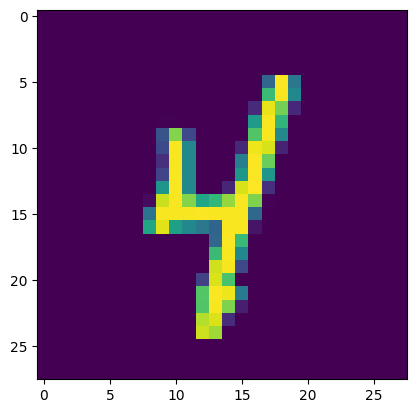

In [194]:
plt.imshow(X[0])
print(f'label: {np.argmax(Y[0])}')

In [ ]:
model = tf.keras.Sequential()
input = tf.keras.layers.Input(shape=(28,28,1))
model.add(input)
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

In [184]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [185]:
history = model.fit(X, Y, batch_size=128, epochs=5, validation_split=.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7120 - loss: 3.9575 - val_accuracy: 0.9650 - val_loss: 0.1205
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9403 - loss: 0.1979 - val_accuracy: 0.9747 - val_loss: 0.0828
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9592 - loss: 0.1315 - val_accuracy: 0.9817 - val_loss: 0.0635
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9662 - loss: 0.1086 - val_accuracy: 0.9815 - val_loss: 0.0587
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9714 - loss: 0.0887 - val_accuracy: 0.9840 - val_loss: 0.0567


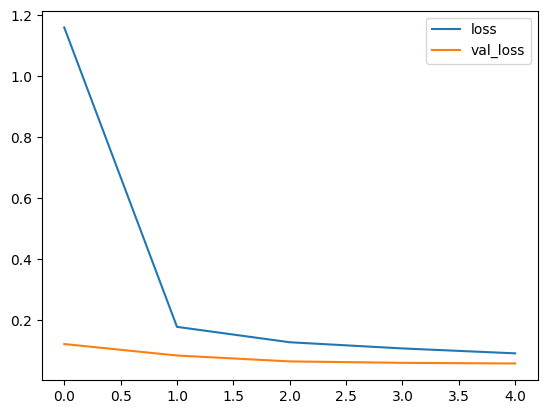

In [186]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
